# **IMDb Movies India**

### **Step 1 :- Importing libraries**

In [ ]:

#!pip install skimpy
#!pip install summarytools
#!pip install polars

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import polars as pl
from summarytools import dfSummary
from skimpy import skim

### **Step 2 :- Loading The Data Set**

In [ ]:
import chardet

with open('IMDb Movies India.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

data = pd.read_csv('IMDb Movies India.csv', encoding=encoding)

In [ ]:
data = pd.read_csv('IMDb Movies India.csv', encoding='latin-1')

### **Step 3:- Domain Analysis**

1. Name :- Name of the movies
2. Year :- Year of relese in theater
3. Duration :- Duration of movie
4. Genre :- Drama/Musical/Comedy/Romance etc
5. Rating :- Rating of movie out of 10
6. Votes :- Votes of movie out of 10
7. Director :- Movies director
8. Actor 1,2,3 :- Names of actor acting in the movie

In [ ]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


### Step 4:- **Summary** of data and Basic Checks **bold text**

In [ ]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
data.describe(include="object")

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7920,14984,13892,13125,12365
unique,13838,102,182,485,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,227,58,158,83,91


In [ ]:
dfSummary(data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Name[object],1. Anjaam2. Mamta3. Zindagi4. Musafir5. Albela6. Toofan7. Guru8. Amar Prem9. Laila Majnu10. Shararat11. other,"7 (0.0%)7 (0.0%)6 (0.0%)6 (0.0%)5 (0.0%)5 (0.0%)5 (0.0%)5 (0.0%)5 (0.0%)5 (0.0%)15,453 (99.6%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADQklEQVR4nO3cwWkbYRRG0TdCJPZGQghUQtKDisg2HauINGGkReJ44yyCS8gdmJxTwb+48BDMp+X9/X2gsFv7Afw/xEZGbGTERkZsZMRGRmxkxEZGbGTERma3LMvXZVme1n4I27ebmS8z83nth7B9zigZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkdnNzI+Z+b32Q9i+xb8YUXFGyYiNjHUVGesqMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9knFEyYiNj8ELG4IWMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlIzYyIiNjHUVGesqMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZ6yoy1lVknFEyYiNj8ELG4IWMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlIzYyBi8kDF4IeOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZ6yoy1lVknFEyYiNjXUXGuoqMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlIzYyBi8kDF4IeOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxhklIzYyYiNjXUXGuoqMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsa6iox1FRlnlIzYyBi8kDF4IeOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxhkls8zM88x8WvshbN7b/nw+fzscDqe1X8K2PR6Pl/3hcDhdr9dfx+Pxde0HsU33+/3pdrud9jMzx+Px9XK5/Fz7UWzasx8IZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZPYzfz8BWfshbNdHX8v5fP7u40n+tcfj8eKzcCpv1lVk/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiPzB0WpV2yec8bJAAAAAElFTkSuQmCC"">",0(0.0%)
2,Year[object],1. nan2. (2019)3. (2021)4. (2018)5. (2017)6. (2005)7. (2020)8. (2016)9. (2004)10. (2015)11. other,"528 (3.4%)410 (2.6%)392 (2.5%)381 (2.5%)360 (2.3%)346 (2.2%)320 (2.1%)305 (2.0%)290 (1.9%)284 (1.8%)11,893 (76.7%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAD3klEQVR4nO3cQWobZwCG4V9BmGQjIQw6jA7Rw/YQcxthNIs4ZKMuEhfJCRRazyuhPs/KERgG8jJihv/z6nw+Dyh8uvUF8P8hNjJiIyM2MmIjIzYyYiMjNjJiI7MaY3wZYzy9+/z7+Xx+vcH18MDWz8/Pf2w2m93lh/M8v6xWqz8Fx0dabzab3eFweN1ut9/GGON0On2epml3PB6fxhhi48Osxxhju91+2+/3Xy8+/3Kj6+GBeUAgIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYy6zF+nGF7++DyZ/hI63meX6Zp2o2LM2zzPL+MMb7f7rJ4RDYIZFb+ZBaV393Z3NVYxC/rKssqlnK1rrKsYkm/W1dZVrEIL3XJiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIXA1ejF1Y0i+DF2MXluJYOBmDFzLubGQMXsgYvJAxeCHjpS4ZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9kHAsnY/BCxgMCGV+jZKyryFhXkbGuIuMBgYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYx1FRnrKjKOhZOxriLjzkbG4IWMwQsZgxcyXuqSERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxrFwMgYvZN7f2dzVWMzV4MXYhSV9ehu8HA6H15/RPf3jb8G/8Pfg5ee/jV1YjJe6ZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRG5mpdBUu6XFdZVrEoGwQy1lVk3NnIWFeRsa4iY11FxktdMmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MgYvZAxeyDgWTsbghYw7GxmDFzIGL2QMXsh4qUtGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMwQsZx8LJGLyQ8YBAxtcoGesqMtZVZKyryHhAICM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiI2NdRca6ioxj4WSsq8i4s5ExeCFj8ELG4IWMl7pkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDF7IGLyQcSycjMELmfd3Nh7LXX1TXQ1eeCz3NmBavw1eLnYIPIDT6fR5mqbd8Xh8GmPcR2xj/Bi87Pf7r7e+GD7cXQ2YvNQlIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY/DyoO7x//Ry8HJXx1H47+5twORY+GO7q2PhBi9kPCCQERsZsZERGxmxkREbGbGRERsZsZH5C7eoEQc9yhqTAAAAAElFTkSuQmCC"">",528(3.4%)
3,Duration[object],1. nan2. 120 min3. 135 min4. 130 min5. 140 min6. 150 min7. 137 min8. 145 min9. 136 min10. 138 min11. other,"8,269 (53.3%)240 (1.5%)173 (1.1%)171 (1.1%)167 (1.1%)154 (1.0%)139 (0.9%)133 (0.9%)130 (0.8%)124 (0.8%)5,809 (37.5%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAEFElEQVR4nO3cQU4jVwBF0W9kkfakLMsSy2ABLILFZhFeAPuwLNegIUzIoOkog1YySHwLzDkr+I0uhV36r1dvb28DCjdLH4CvQ2xkxEZGbGTERk

In [ ]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 15509  │ │ string      │ 9     │                                                          │
│ │ Number of columns │ 10     │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name      ┃ NA     ┃ NA %     ┃ mean     ┃ sd      ┃ p0    ┃ p25   ┃ p50   ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ Rating           │   7590 │    48.94 │    5.842 │   1.382 │   1.1 │   4.9 │     6 │  6.8 │    10 │   ▂▅▇▃  │  │
│ └──────────────────┴────────┴──────────┴──────────┴─────────┴───────┴───────┴───────┴──────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name              ┃ NA         ┃ NA %         ┃ words per row              ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Name                     │          0 │            0 │                        2.3 │                  35408 │  │
│ │ Year                     │        528 │          3.4 │                       0.97 │                  14981 │  │
│ │ Duration                 │       8269 │        53.32 │                       0.93 │                  14480 │  │
│ │ Genre                    │       1877 │         12.1 │                        1.5 │                  23073 │  │
│ │ Votes                    │       7589 │        48.93 │                       0.51 │                   7920 │  │
│ │ Director                 │        525 │         3.39 │                          2 │                  30379 │  │
│ │ Actor 1                  │       1617 │        10.43 │                        1.7 │                  25763 │  │
│ │ Actor 2                  │       2384 │        15.37 │                        1.6 │                  24058 │  │
│ │ Actor 3                  │       3144 │        20.27 │                        1.5 │                  22648 │  │
│ └──────────────────────────┴────────────┴──────────────┴────────────────────────────┴────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
data.shape

(15509, 10)

Insight

# **Step 5 :- Data Cleaning**

In [ ]:

#droping all nul values
data.dropna(inplace=True)

In [ ]:
# Cleaning the data
data["Year"]=data["Year"].str.strip("()").astype(int)
data["Duration"]=data["Duration"].str.replace(" min","").astype(int)
data["Votes"]=data["Votes"].str.replace(",","").astype(int)

In [ ]:

data.shape

(5659, 10)

In [ ]:
data['Genre'] = data['Genre'].str.split(', ')
data = data.explode('Genre')
data['Genre'].fillna(data['Genre'].mode()[0], inplace=True)

In [ ]:
# Removing the duplicates values
data.duplicated().sum()
data.drop_duplicates(inplace=True)

# **Step 6 :- Descriptive Analysis**

In [ ]:
# Find the row with the highest number of votes
max_votes_row = data[data['Votes'] == data['Votes'].max()]

# Get the name of the movie with the highest votes
movie_highest_votes = max_votes_row['Name'].values[0]

# Find the number of votes for the movie with the highest votes
votes_highest_votes = max_votes_row['Votes'].values[0]

print("Movie with the highest votes:", movie_highest_votes)
print("Number of votes for the movie with the highest votes:", votes_highest_votes)
print('\n', '_'*80, '\n')


# Find the row with the lowest number of votes
min_votes_row = data[data['Votes'] == data['Votes'].min()]

# Get the name of the movie with the lowest votes
movie_lowest_votes = min_votes_row['Name'].values[0]

# Find the number of votes for the movie with the lowest votes
votes_lowest_votes = min_votes_row['Votes'].values[0]

print("Movie with the highest votes:", movie_lowest_votes)
print("Number of votes for the movie with the highest votes:", votes_lowest_votes)

Movie with the highest votes: Life of Pi
Number of votes for the movie with the highest votes: 591417

 ________________________________________________________________________________ 

Movie with the highest votes: Anmol Sitaare
Number of votes for the movie with the highest votes: 5


In [ ]:
# Find the row with the highest rating
max_rating_row = data[data['Rating'] == data['Rating'].max()]
movie_highest_rating = max_rating_row['Name'].values[0]
votes_highest_rating = max_rating_row['Votes'].values[0]

print("Movie with the highest rating:", movie_highest_rating)
print("Number of votes for the movie with the highest rating:", votes_highest_rating)
print('\n', '_'*80, '\n')


# Find the row with the lowest rating
min_rating_row = data[data['Rating'] == data['Rating'].min()]
movie_lowest_rating = min_rating_row['Name'].values[0]
votes_lowest_rating = min_rating_row['Votes'].values[0]

print("Movie with the highest rating:", movie_lowest_rating)
print("Number of votes for the movie with the highest rating:", votes_lowest_rating)


Movie with the highest rating: Love Qubool Hai
Number of votes for the movie with the highest rating: 5

 ________________________________________________________________________________ 

Movie with the highest rating: Sadak 2
Number of votes for the movie with the highest rating: 67785


In [ ]:
# Group the dataset by the 'Director' column and count the number of movies each director has directed
director_counts = data['Director'].value_counts()

# Find the director with the highest number of movies directed
most_prolific_director = director_counts.idxmax()
num_movies_directed = director_counts.max()

print("Director with the most movies directed:", most_prolific_director)
print("Number of movies directed by", most_prolific_director, ":", num_movies_directed)
print('\n', '_'*80, '\n')


# Group the dataset by the 'Director' column and count the number of movies each director has directed
director_counts = data['Director'].value_counts()

# Find the director with the lowest number of movies directed
least_prolific_director = director_counts.idxmin()
num_movies_directed = director_counts.min()

print("Director with the most movies directed:", least_prolific_director)
print("Number of movies directed by", most_prolific_director, ":", num_movies_directed)

Director with the most movies directed: David Dhawan
Number of movies directed by David Dhawan : 103

 ________________________________________________________________________________ 

Director with the most movies directed: Bornila Chatterjee
Number of movies directed by David Dhawan : 1


# **Step 6:- EDA**
### 6.1 Univariate Analysis

In [ ]:
  import plotly.graph_objects as go
  import plotly.express as px

  fig_year = px.histogram(data, x = 'Year',nbins = 50)
  fig_year.update_layout(title='Distribution of Year' ,xaxis_title='Year',bargap=0.2)
  fig_year.show()

In [ ]:
fig_year = px.histogram(data, x = 'Duration',nbins = 50)
fig_year.update_layout(title='Distribution of Duration' ,xaxis_title='Duration',bargap=0.2)
fig_year.show()

In [ ]:
fig_year = px.histogram(data, x = 'Rating',nbins = 50)
fig_year.update_layout(title='Distribution of Rating' ,xaxis_title='Rating',bargap=0.2)
fig_year.show()

In [ ]:
fig_year = px.box(data, x = 'Votes')
fig_year.update_layout(title='Distribution of Votes' ,xaxis_title='Votes',bargap=0.2)
fig_year.show()

Insights


### 6.2 Bivarate Analysis

In [ ]:
year_avg_rating = data.groupby('Year')['Rating'].mean().reset_index()

top_5_years = year_avg_rating.nlargest(20, 'Rating')
fig = px.bar(top_5_years, x='Year', y='Rating', title='Top 20 Years by Average Rating', color = "Rating")
fig.update_xaxes(type='category')
fig.update_layout(xaxis_title='Year', yaxis_title='Average Rating')
fig.show()

In [ ]:
# Group data by Year and calculate the average rating
average_rating_by_year = data.groupby('Year')['Rating'].mean().reset_index()

# Create the line plot with Plotly Express
fig = px.line(average_rating_by_year, x='Year', y='Rating')
fig.update_layout(title='Are there any trends in ratings across year?')
fig.show()


In [ ]:
# Group data by Year and calculate the average rating
average_rating_by_year = data.groupby('Year')['Votes'].mean().reset_index()

# Create the line plot with Plotly Express
fig = px.line(average_rating_by_year, x='Year', y='Votes')
fig.update_layout(title='Are there any trends in votes across year?')
fig.show()

In [ ]:
# Group data by Year and calculate the average rating
average_rating_by_year = data.groupby(['Year', 'Genre'])['Rating'].mean().reset_index()

# Get the top 3 genres
top_3_genres = data['Genre'].value_counts().head(3).index

# Filter the data to include only the top 3 genres
average_rating_by_year = average_rating_by_year[average_rating_by_year['Genre'].isin(top_3_genres)]

# Create the line plot with Plotly Express
fig = px.line(average_rating_by_year, x='Year', y='Rating', color = "Genre")

# Customize the layout
fig.update_layout(title='Average Rating by Year for Top 3 Genres', xaxis_title='Year', yaxis_title='Average Rating', legend_title='Genre')
fig.show()

In [ ]:
fig_dur_rat = px.scatter(data, x = 'Duration', y = 'Rating', trendline='ols', color = "Rating")
fig_dur_rat.update_layout(title='Does length of movie have any impact on rating?', xaxis_title='Duration', yaxis_title='Rating')
fig_dur_rat.show()

## **Step 6 :- Data Preprocessing**

In [ ]:
# Feature Engineering
genre_mean_rating = data.groupby('Genre')['Rating'].transform('mean')
data['Genre_mean_rating'] =genre_mean_rating

director_mean_rating = data.groupby('Director')['Rating'].transform('mean')
data['Director_encoded'] = director_mean_rating

actor1_mean_rating = data.groupby('Actor 1')['Rating'].transform('mean')
data['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = data.groupby('Actor 2')['Rating'].transform('mean')
data['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = data.groupby('Actor 3')['Rating'].transform('mean')
data['Actor3_encoded'] = actor3_mean_rating

In [ ]:
data.drop(["Actor 1","Actor 2","Actor 3","Director","Name"],axis=1,inplace=True)

In [ ]:
# Handling Outlier
data.columns

Index(['Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Genre_mean_rating',
       'Director_encoded', 'Actor1_encoded', 'Actor2_encoded',
       'Actor3_encoded'],
      dtype='object')

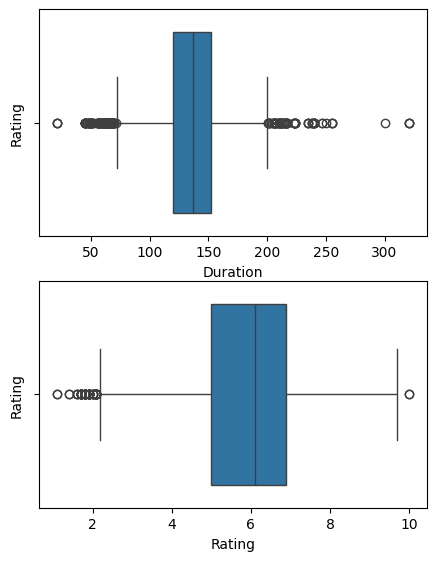

In [ ]:
box=data[['Duration',"Rating"]]
plt.figure(figsize=(5,10), facecolor='white')#to sey canvas size
plotnumber = 1#counter

for column in box:#acc
    if plotnumber<=10 : # as there are 9 columns in the data
        ax = plt.subplot(3,1,plotnumber)#plotting 3 graphs
        sns.boxplot(x=box[column])#boxplot to check for outlier
        plt.xlabel(column,fontsize=10)#assign name to x-axis and set font-20
        plt.ylabel('Rating',fontsize=10)
    plotnumber+=1#counter increment
plt.show()#to show plot

In [ ]:
Q1 = data['Duration'].quantile(0.25)
Q3 = data['Duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = data[(data['Duration'] >= lower_bound) & (data['Duration'] <= upper_bound)]
df.head(5)

,Year,Duration,Genre,Rating,Votes,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019,109,Drama,7.0,8,6.056744,7.000000,6.850000,7.00,7.00
3,2019,110,Comedy,4.4,35,5.751042,4.400000,5.250000,4.40,4.46
3,2019,110,Romance,4.4,35,5.811087,4.400000,5.250000,4.40,4.46
5,1997,147,Comedy,4.7,827,5.751042,5.335135,4.793617,5.73,5.93
5,1997,147,Drama,4.7,827,6.056744,5.335135,4.793617,5.73,5.93


In [ ]:
Q1 = df['Rating'].quantile(0.25)
Q3 = df['Rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Rating'] >= lower_bound) & (df['Rating'] <= upper_bound)]
df.head(5)

,Year,Duration,Genre,Rating,Votes,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019,109,Drama,7.0,8,6.056744,7.000000,6.850000,7.00,7.00
3,2019,110,Comedy,4.4,35,5.751042,4.400000,5.250000,4.40,4.46
3,2019,110,Romance,4.4,35,5.811087,4.400000,5.250000,4.40,4.46
5,1997,147,Comedy,4.7,827,5.751042,5.335135,4.793617,5.73,5.93
5,1997,147,Drama,4.7,827,6.056744,5.335135,4.793617,5.73,5.93


# **Model Buliding**

In [ ]:
  X = df[[ 'Year', 'Votes', 'Duration', 'Genre_mean_rating','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
  y = df['Rating']

In [ ]:
# Splitting the dataset into training and testing parts
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# Building machine learning models and training them
# SVC, Decision Tree
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)


In [ ]:
# Evaluating the performance of trained algos
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print('The performance evaluation of Linear Regression is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, lr_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, lr_pred))
print('R2 score: ',r2_score(y_test, lr_pred))

The performance evaluation of Linear Regression is below:  

Mean squared error:  0.42641240749918646
Mean absolute error:  0.4895096168996695
R2 score:  0.7662490559430534


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:

RFR = RandomForestRegressor(n_estimators=100, random_state=1)
RFR.fit(X_train, y_train)
rf_preds = RFR.predict(X_test)

In [ ]:
print('Mean squared error: ',mean_squared_error(y_test, rf_preds))
print('Mean absolute error: ',mean_absolute_error(y_test, rf_preds))
print('R2 score: ',r2_score(y_test, rf_preds))

Mean squared error:  0.10676133077905495
Mean absolute error:  0.17585696040868473
R2 score:  0.9414755259943329


In [ ]:
#Model Testing

In [ ]:
# Checking a sample of predictor values on whom the model is trained
X.head()

,Year,Votes,Duration,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019,8,109,6.056744,7.000000,6.850000,7.00,7.00
3,2019,35,110,5.751042,4.400000,5.250000,4.40,4.46
3,2019,35,110,5.811087,4.400000,5.250000,4.40,4.46
5,1997,827,147,5.751042,5.335135,4.793617,5.73,5.93
5,1997,827,147,6.056744,5.335135,4.793617,5.73,5.93


In [ ]:
# Checking the rating according to above predictor variables
y.head()

1    7.0
3    4.4
3    4.4
5    4.7
5    4.7
Name: Rating, dtype: float64

In [ ]:
# Creating a new dataframe with values close to the 3rd row according to the sample above

data = {'Year': [2016], 'Votes': [58], 'Duration': [121], 'Genre_mean_rating': [4.5], 'Director_encoded': [5.8], 'Actor1_encoded': [5.9], 'Actor2_encoded': [5.9], 'Actor3_encoded': [5.900]}
df = pd.DataFrame(data)

In [ ]:
# Predict the movie rating
predicted_rating = RFR.predict(df)

# Display the predicted rating
print("Predicted Rating:", predicted_rating[0])

Predicted Rating: 5.771999999999994
